In [1]:
#import libraries
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
#keys
api_key = os.environ.get('YOUTUBE_API_KEY')
channel_ids = ["UCtko78VkmxkU6bKRxgQDDSQ"]

In [4]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [5]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()
    
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
    return(pd.DataFrame(all_data))

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [7]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Uyanga S,22700,1549873,123,UUtko78VkmxkU6bKRxgQDDSQ


In [8]:
playlist_id = 'UUtko78VkmxkU6bKRxgQDDSQ'
def get_video_ids(youtube, playlist_id):
    
    video_ids=[]
    
    request = youtube.playlistItems().list(
        part="snippet, contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
             part="contentDetails",
             playlistId=playlist_id,
             maxResults = 50,
             pageToken = next_page_token)
        response = request.execute()
        
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token = response.get('nextPageToken')
    return video_ids  

In [9]:
video_ids=get_video_ids(youtube, playlist_id)

In [10]:
len(video_ids)

123

In [11]:
def get_video_details(youtube, video_ids):
    all_video_info =[]
    
    for i in range (0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i: i+50])
        )
        response = request.execute()
        
        for video  in response['items']:
            stats_to_keep = {'snippet':['channelTitle', 'title', 'description','tags','publishedAt','categoryId'],
                             'statistics': ['viewCount','likeCount','favouriteCount','commentCount'],
                             'contentDetails': ['duration','caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v]= video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    return pd.DataFrame(all_video_info)

In [12]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,categoryId,viewCount,likeCount,favouriteCount,commentCount,duration,caption
0,DR4iAOmrpMw,Uyanga S,[Болсон явдал] АЛУУРЧНЫГ ЗӨГНӨН ГЭРЭЭСЛЭЛ ҮЛДЭ...,Миний инстаграмаар зочлоорой 🫶🏻\n✨https://www....,None,2024-06-20T15:53:02Z,19,26717,1518,None,44,PT22M25S,false
1,JNO8tAI5DrA,Uyanga S,[Unboxing] Найзаасаа ийм гоё бэлэг аваад та на...,,None,2024-06-04T07:06:55Z,19,315,7,None,1,PT53S,false
2,H3ZrfpSIlEc,Uyanga S,[Болсон явдал] ТИКТОК ПЛАТФОРМ АШИГЛАН ХЭРЭГ Ү...,Миний инстаграмаар зочлоорой 🫶🏻\n✨https://www....,None,2024-04-30T11:47:23Z,19,23079,1179,None,33,PT22M35S,false
3,u0pvuUYW4Dk,Uyanga S,[Болсон явдал] ЭНЭ АЙМШИГТ ХЭРГИЙГ 13 НАСТАЙ Х...,Миний инстаграмаар зочлоорой 🫶🏻\n✨https://www....,None,2024-04-12T12:54:32Z,19,20840,1083,None,41,PT14M35S,false
4,o3iw9Xeha5M,Uyanga S,ХЭДИЙНБЭЭ 🤑💸 | ХАМАГ НУУЦАА Л ЯРИВ 🤫 | WHAT...,📢 Music by solukewarm! - keep up! - ✔️https://...,None,2024-03-07T14:28:53Z,19,2329,128,None,24,PT24M17S,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,XgjId6tMQPc,Uyanga S,Trying to become “That girl” for a day | Хэрхэ...,Hey guys! Welcome back to my channel\nЭнэ удаа...,None,2021-07-20T15:24:40Z,26,589,39,None,3,PT9M26S,false
119,lr8kZKKPFjE,Uyanga S,Хэрхэн aesthetic homescreen iphone утсан дээр ...,Сайн байцгаана уу?\nIphone-той хүмүүсээ наашаа...,None,2021-07-13T06:33:55Z,26,935,34,None,3,PT10M1S,false
120,kXiGOQihdkg,Uyanga S,Зуны зугаатай өдөр | How i am spending my summ...,Hi guys шинэхэн бичлэгээ тухлан сууж үзээрэй.,None,2021-07-09T14:43:01Z,26,579,32,None,7,PT19M48S,false
121,Sw_pp9pAaOE,Uyanga S,Waking up at 5am for a week | Би яг өглөөний х...,Hey guys! Welcome back to my channel\nЭнэ удаа...,None,2021-07-06T18:47:41Z,26,787,46,None,20,PT12M54S,false


In [13]:
video_df.isnull().sum()

video_id            0
channelTitle        0
title               0
description         0
tags              123
publishedAt         0
categoryId          0
viewCount           0
likeCount           0
favouriteCount    123
commentCount        2
duration            0
caption             0
dtype: int64

In [14]:
video_df.drop(['tags','favouriteCount','caption','categoryId'], axis = 1, inplace =True)

In [15]:
video_df.dtypes

video_id        object
channelTitle    object
title           object
description     object
publishedAt     object
viewCount       object
likeCount       object
commentCount    object
duration        object
dtype: object

In [16]:
numeric_cols = ['viewCount','likeCount','commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [17]:
from dateutil import parser
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishedDay'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))
video_df['publishedYear'] = pd.to_datetime(video_df['publishedAt']).dt.year

In [18]:
video_df['publishedTime'] = pd.to_datetime(video_df['publishedAt']).dt.hour
def categorize_by_time(hour):
    if 5<= hour <12:
        return 'Morning'
    elif 12 <= hour <17:
        return 'Afternoon'
    elif 17 <= hour <21:
        return 'Evening'
    else:
        return "Night"
video_df['timeOfDay'] = video_df['publishedTime'].apply(categorize_by_time)

In [19]:
import isodate
video_df['durationMins'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationMins'] =(video_df['durationMins'].apply(lambda x: x.total_seconds()))/60

In [20]:
video_df.head()

,video_id,channelTitle,title,description,publishedAt,viewCount,likeCount,commentCount,duration,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins
0,DR4iAOmrpMw,Uyanga S,[Болсон явдал] АЛУУРЧНЫГ ЗӨГНӨН ГЭРЭЭСЛЭЛ ҮЛДЭ...,Миний инстаграмаар зочлоорой 🫶🏻\n✨https://www....,2024-06-20 15:53:02+00:00,26717.0,1518.0,44.0,PT22M25S,Thursday,2024,15,Afternoon,22.416667
1,JNO8tAI5DrA,Uyanga S,[Unboxing] Найзаасаа ийм гоё бэлэг аваад та на...,,2024-06-04 07:06:55+00:00,315.0,7.0,1.0,PT53S,Tuesday,2024,7,Morning,0.883333
2,H3ZrfpSIlEc,Uyanga S,[Болсон явдал] ТИКТОК ПЛАТФОРМ АШИГЛАН ХЭРЭГ Ү...,Миний инстаграмаар зочлоорой 🫶🏻\n✨https://www....,2024-04-30 11:47:23+00:00,23079.0,1179.0,33.0,PT22M35S,Tuesday,2024,11,Morning,22.583333
3,u0pvuUYW4Dk,Uyanga S,[Болсон явдал] ЭНЭ АЙМШИГТ ХЭРГИЙГ 13 НАСТАЙ Х...,Миний инстаграмаар зочлоорой 🫶🏻\n✨https://www....,2024-04-12 12:54:32+00:00,20840.0,1083.0,41.0,PT14M35S,Friday,2024,12,Afternoon,14.583333
4,o3iw9Xeha5M,Uyanga S,ХЭДИЙНБЭЭ 🤑💸 | ХАМАГ НУУЦАА Л ЯРИВ 🤫 | WHAT...,📢 Music by solukewarm! - keep up! - ✔️https://...,2024-03-07 14:28:53+00:00,2329.0,128.0,24.0,PT24M17S,Thursday,2024,14,Afternoon,24.283333


In [21]:
def categorize_by_duration(duration):
    if duration < 1:
        return 'shorts'
    else:
        return 'video'
    
video_df['videoType'] = video_df['durationMins'].apply(categorize_by_duration)

In [22]:
categories = {
    'Crime': ['болсон явдал'],
    'Review': ['unboxing','review','bought','авсан','амттан','snacks','зарлагатай','сард'],
    'Howto': ['youtube', "what's", 'skincare'],
    'Trendy':['single']
}
def categorize_by_content(title):
    title = title.lower()
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Vlog'
video_df['category'] = video_df['title'].apply(categorize_by_content)

In [23]:
video_df.sample(7)

,video_id,channelTitle,title,description,publishedAt,viewCount,likeCount,commentCount,duration,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins,videoType,category
53,vPRJ5yJg13M,Uyanga S,Trying strawberry icetea at a korean convenien...,,2023-03-27 08:56:38+00:00,1157.0,48.0,0.0,PT51S,Monday,2023,8,Morning,0.850000,shorts,Vlog
48,paqYsDsieO4,Uyanga S,[Болсон явдал] Boys don’t cry киноны бодит түү...,,2023-04-22 03:48:41+00:00,2423.0,110.0,3.0,PT1M,Saturday,2023,3,Night,1.000000,video,Crime
44,X1hZ-TE7ETE,Uyanga S,Youtuber болохоор шийдсэн бол дараах зүйлсийг ...,,2023-05-10 10:02:26+00:00,589.0,58.0,NaN,PT51S,Wednesday,2023,10,Morning,0.850000,shorts,Howto
116,hEdSGiSRbnE,Uyanga S,Аяллын тэмдэглэл | Farglory ocean park | Taiwan,,2021-08-05 14:15:22+00:00,429.0,30.0,2.0,PT16M5S,Thursday,2021,14,Afternoon,16.083333,video,Vlog
90,b1nwQaZ9Cf0,Uyanga S,Let’s go to the beach 🏝,Udaan uulzaagui ta nartaigaa dahiad uulzaj bga...,2022-04-11 14:37:35+00:00,283.0,30.0,8.0,PT7M22S,Monday,2022,14,Afternoon,7.366667,video,Vlog
61,7_GvtgEfqXQ,Uyanga S,[Болсон явдал] Ороc супер моделийн нууцлаг үхэл,Nana ricci link : https://youtu.be/USeoyat4yos,2023-01-19 04:36:06+00:00,108292.0,2462.0,103.0,PT14M41S,Thursday,2023,4,Night,14.683333,video,Crime
34,CFDf8Y-Ep1U,Uyanga S,Нүүрээ будангаа асуултанд хариулъя | Миний mak...,,2023-07-30 07:57:45+00:00,948.0,72.0,7.0,PT18M43S,Sunday,2023,7,Morning,18.716667,video,Vlog


In [24]:
video_df.drop(['description', 'publishedAt','duration'], axis =1, inplace =True)
video_df.head(2)

,video_id,channelTitle,title,viewCount,likeCount,commentCount,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins,videoType,category
0,DR4iAOmrpMw,Uyanga S,[Болсон явдал] АЛУУРЧНЫГ ЗӨГНӨН ГЭРЭЭСЛЭЛ ҮЛДЭ...,26717.0,1518.0,44.0,Thursday,2024,15,Afternoon,22.416667,video,Crime
1,JNO8tAI5DrA,Uyanga S,[Unboxing] Найзаасаа ийм гоё бэлэг аваад та на...,315.0,7.0,1.0,Tuesday,2024,7,Morning,0.883333,shorts,Review


C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129297 (\N{MONEY-MOUTH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129762 (\N{FACE WITH OPEN EYES AND HAND OVER MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C

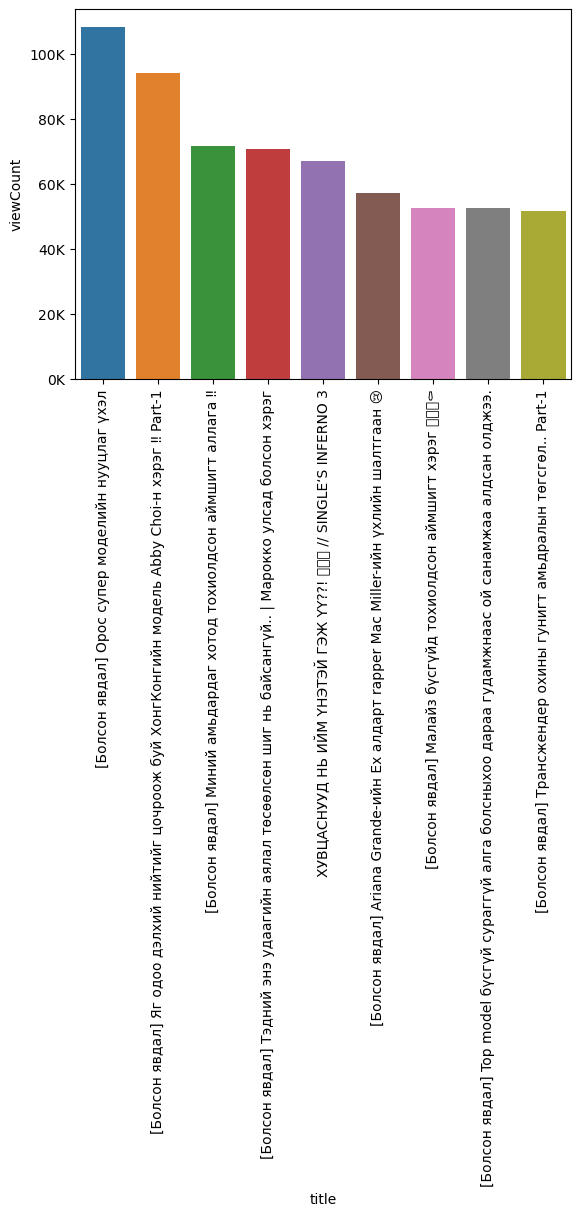

In [25]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
plt.show()

C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128226 (\N{PUBLIC ADDRESS LOUDSPEAKER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.print_figure(

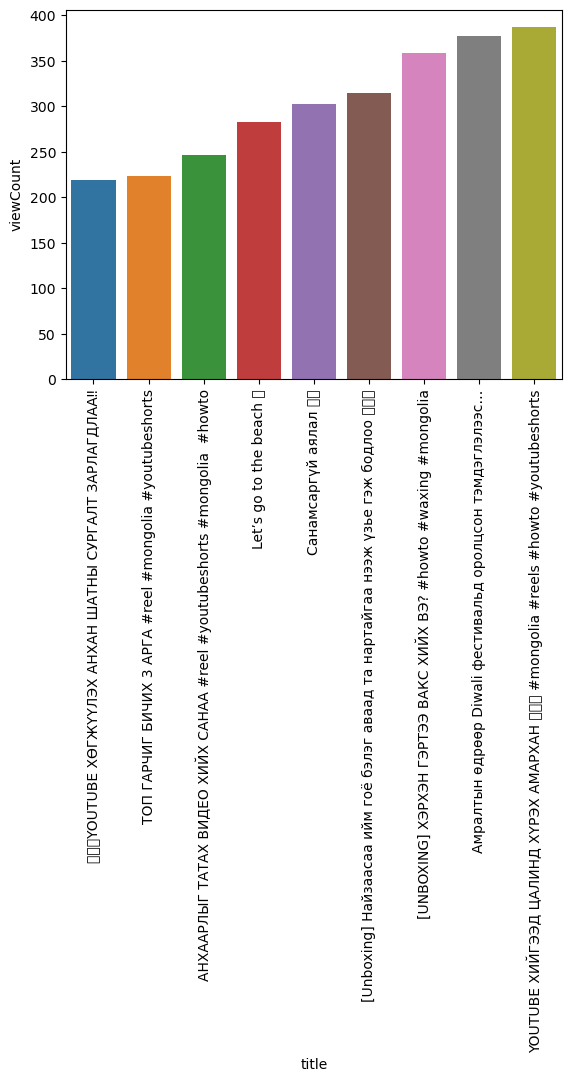

In [26]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

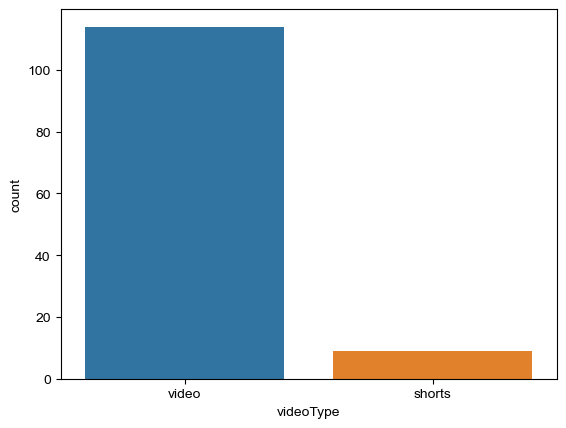

In [27]:
sns.countplot(x = 'videoType', data = video_df)
sns.set_style('whitegrid')

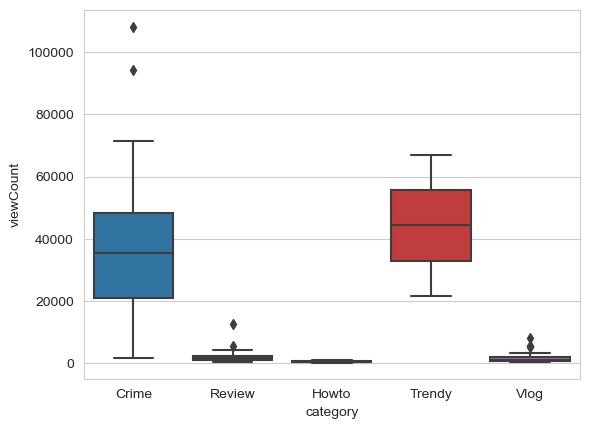

In [28]:
sns.boxplot(x = 'category', y='viewCount', data = video_df)
sns.set_style('whitegrid')

Text(0, 0.5, 'View Count')

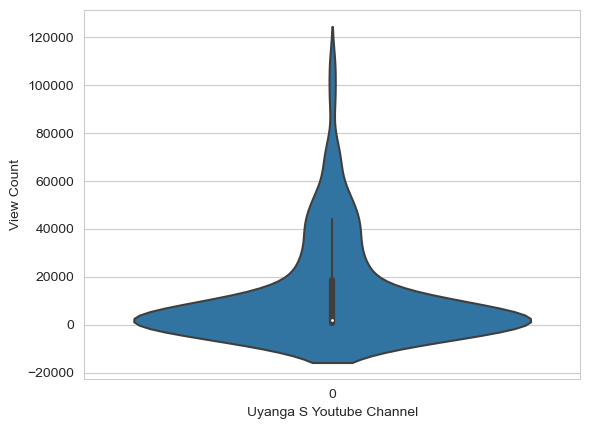

In [29]:
sns.violinplot(video_df['viewCount'])
plt.xlabel('Uyanga S Youtube Channel')
plt.ylabel('View Count')

<Axes: xlabel='publishedDay', ylabel='count'>

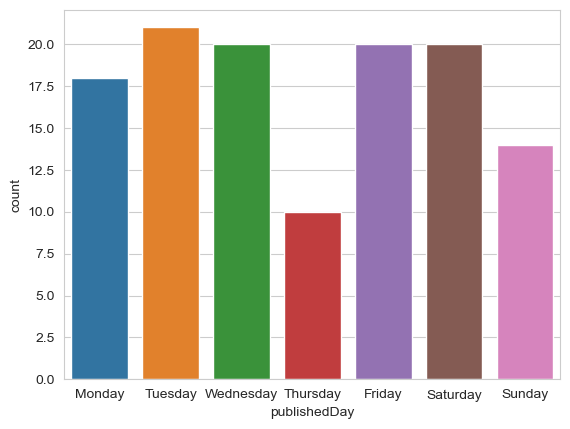

In [30]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='publishedDay', data = video_df, order =days_order)

<Axes: xlabel='publishedDay', ylabel='viewCount'>

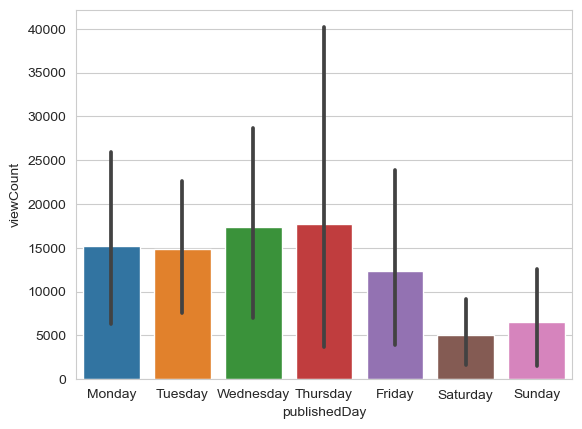

In [31]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='publishedDay',y= 'viewCount', data = video_df, order =days_order)

<Axes: xlabel='publishedYear', ylabel='count'>

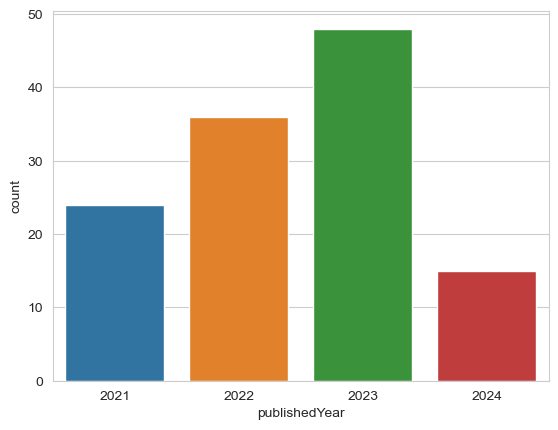

In [32]:
sns.countplot(x='publishedYear', data = video_df)

<Axes: xlabel='publishedTime', ylabel='Count'>

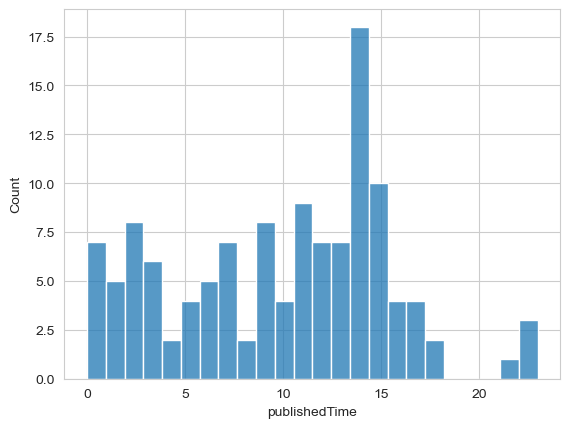

In [33]:
sns.histplot(x = 'publishedTime', data = video_df, bins = 24)

<Axes: xlabel='timeOfDay', ylabel='viewCount'>

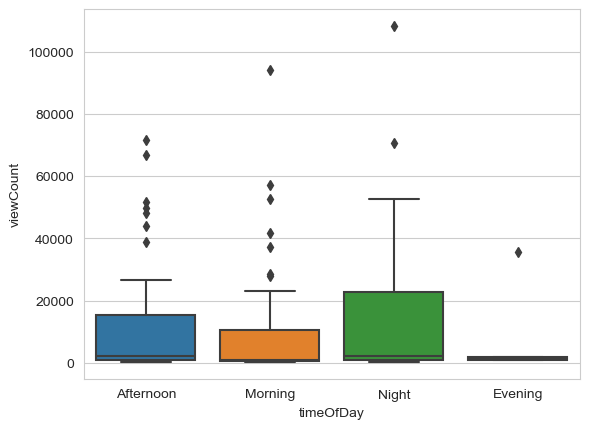

In [34]:
sns.boxplot(x='timeOfDay',y= 'viewCount', data = video_df)

<Axes: xlabel='durationMins', ylabel='Count'>

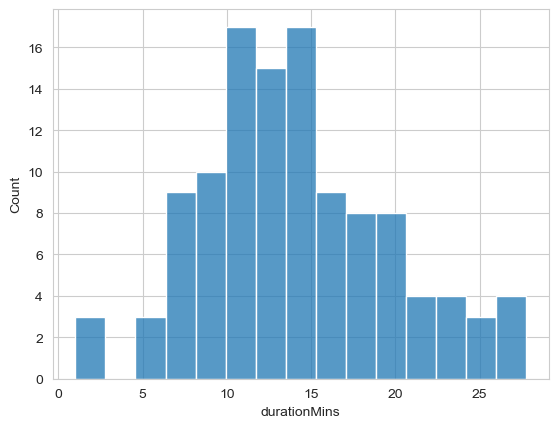

In [35]:
filtered_df = video_df[video_df['videoType'] == 'video']
sns.histplot(x = 'durationMins', data =filtered_df, bins = 15)

<Axes: xlabel='likeCount', ylabel='viewCount'>

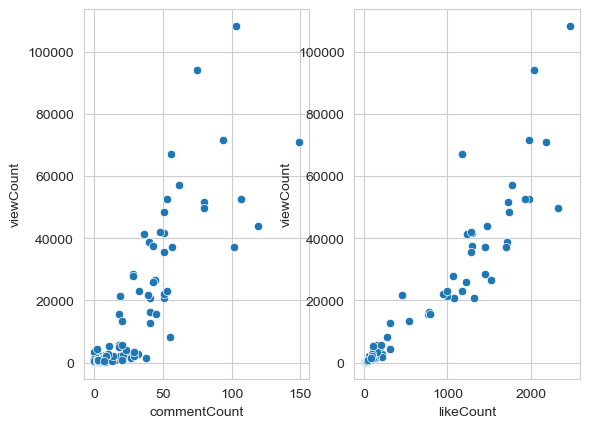

In [36]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(x='commentCount', y = 'viewCount', data = video_df, ax = ax[0])
sns.scatterplot(x='likeCount', y = 'viewCount', data = video_df, ax = ax[1])

<Axes: >

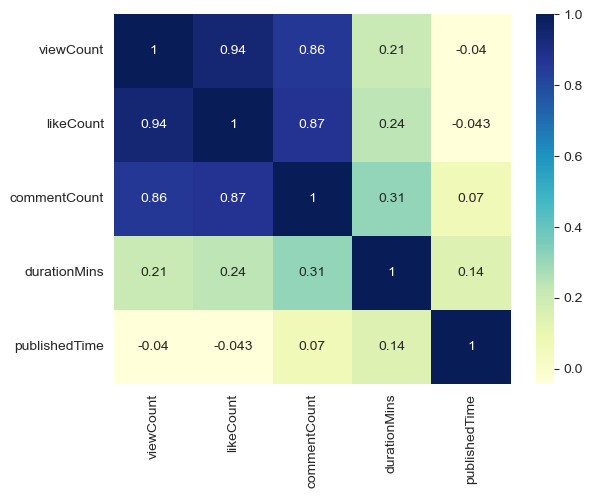

In [37]:
features = ['viewCount','likeCount', 'commentCount','durationMins','publishedTime']
sns.heatmap(video_df[features].corr(), cmap="YlGnBu", annot=True) 

In [38]:
video_df.drop(['video_id','channelTitle','title'], axis =1, inplace =True)
video_df.head(3)

,viewCount,likeCount,commentCount,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins,videoType,category
0,26717.0,1518.0,44.0,Thursday,2024,15,Afternoon,22.416667,video,Crime
1,315.0,7.0,1.0,Tuesday,2024,7,Morning,0.883333,shorts,Review
2,23079.0,1179.0,33.0,Tuesday,2024,11,Morning,22.583333,video,Crime


In [39]:
video_df.describe()

,viewCount,likeCount,commentCount,publishedYear,publishedTime,durationMins
count,123.000000,123.000000,121.000000,123.000000,123.000000,123.000000
mean,12608.593496,460.837398,23.504132,2022.439024,9.829268,13.107859
std,21009.886897,653.256500,28.356400,0.942149,5.722700,6.408868
min,219.000000,7.000000,0.000000,2021.000000,0.000000,0.433333
25%,806.500000,49.500000,4.000000,2022.000000,5.000000,9.500000
50%,1871.000000,103.000000,11.000000,2023.000000,11.000000,12.983333
75%,18551.500000,787.000000,38.000000,2023.000000,14.000000,17.058333
max,108292.000000,2462.000000,149.000000,2024.000000,23.000000,27.766667


In [40]:
video_df.isna().sum()

viewCount        0
likeCount        0
commentCount     2
publishedDay     0
publishedYear    0
publishedTime    0
timeOfDay        0
durationMins     0
videoType        0
category         0
dtype: int64

In [41]:
video_df['commentCount']=video_df['commentCount'].fillna(video_df['commentCount'].median())

In [42]:
features = ['publishedDay','videoType','category','timeOfDay']
dummies = pd.get_dummies(video_df[features], drop_first = True)
video_df= pd.concat([video_df,dummies], axis = 1)
video_df.drop(features, axis = 1, inplace = True)

In [43]:
video_df.sample(5)

,viewCount,likeCount,commentCount,publishedYear,publishedTime,durationMins,publishedDay_Monday,publishedDay_Saturday,publishedDay_Sunday,publishedDay_Thursday,publishedDay_Tuesday,publishedDay_Wednesday,videoType_video,category_Howto,category_Review,category_Trendy,category_Vlog,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night
63,16263.0,784.0,41.0,2022,14,13.300000,False,False,False,False,False,False,True,False,False,False,False,False,False,False
35,1409.0,104.0,11.0,2023,7,8.933333,False,False,False,False,False,True,True,False,False,False,True,False,True,False
95,3251.0,160.0,29.0,2022,14,18.150000,False,True,False,False,False,False,True,False,False,False,True,False,False,False
82,509.0,52.0,5.0,2022,11,11.383333,False,False,False,True,False,False,True,False,False,False,True,False,True,False
20,724.0,47.0,2.0,2023,5,14.900000,False,False,True,False,False,False,True,False,False,False,True,False,True,False


In [44]:
video_df.dtypes

viewCount                 float64
likeCount                 float64
commentCount              float64
publishedYear               int32
publishedTime               int32
durationMins              float64
publishedDay_Monday          bool
publishedDay_Saturday        bool
publishedDay_Sunday          bool
publishedDay_Thursday        bool
publishedDay_Tuesday         bool
publishedDay_Wednesday       bool
videoType_video              bool
category_Howto               bool
category_Review              bool
category_Trendy              bool
category_Vlog                bool
timeOfDay_Evening            bool
timeOfDay_Morning            bool
timeOfDay_Night              bool
dtype: object

In [45]:
X = video_df.drop('viewCount', axis =1)

In [46]:
y=video_df['viewCount']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9163763805938526

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits = 5, test_size =0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y, cv = cv)

array([0.86908044, 0.89978453, 0.85929136, 0.86668469, 0.83239446])

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Nomundari\anaconda

,model,best_score,best_params
0,linear_regression,0.865447,{}
1,lasso,0.865591,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.789527,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [51]:
# import pickle
# with open ('youtube_model.pickle', 'wb') as f:
#     pickle.dump(lr, f)